# ENGS 108 Applied Machine Learning 
## Final Project

### Predicting likelyhood of a song being successful

Idea from the Kaggle data set found here: https://www.kaggle.com/geomack/spotifyclassification


In [64]:
import pandas as pd 
import numpy as np
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.model_selection import train_test_split
from sklearn import metrics
#for scaling the data
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
cid ="af834c73413b4e3abe51409e54a12b56" #CLIENT ID
secret = "c572f66c7257454ea5189dee36084cdd" # CLIENT SECRET

In [3]:
def get_playlist(user_ID, playlist_URI, cid, secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    playlist = sp.user_playlist(user_ID, playlist_URI) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    titles = []
    artists = []
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"])
        artists.append(songs[i]['track']['artists'][0]['name'])
        titles.append(songs[i]['track']['album']['name'])
    features = sp.audio_features(ids) 
    return pd.DataFrame(features), artists, titles

In [4]:
user_ID = "gravsibs"
playlist_URI = "7zhfzvSSo9Q0JWzkbw2w5j"
df, df['artist'], df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
df = df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
df['target'] = np.ones(len(df))

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
playlist = sp.user_playlist(user_ID, playlist_URI) 
songs = playlist["tracks"]["items"] 
ids = [] 
titles = []
artists = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"])
    artists.append(songs[i]['track']['artists'][0]['name'])
    titles.append(songs[i]['track']['album']['name'])
features = sp.audio_features(ids) 

For each song we get a string of information that looks like this

In [16]:
playlist

{u'collaborative': False,
 u'description': None,
 u'external_urls': {u'spotify': u'http://open.spotify.com/user/gravsibs/playlist/7zhfzvSSo9Q0JWzkbw2w5j'},
 u'followers': {u'href': None, u'total': 5},
 u'href': u'https://api.spotify.com/v1/users/gravsibs/playlists/7zhfzvSSo9Q0JWzkbw2w5j',
 u'id': u'7zhfzvSSo9Q0JWzkbw2w5j',
 u'images': [{u'height': 640,
   u'url': u'https://mosaic.scdn.co/640/765a000fecabc76c38e7658ee252aab53c2f3ffd7a8870c5a1381f6b2c63f38ef866d975327eca782bab6c57965383ea93a7eeefe20a1418966ca1dafa760b6efd6f6097217a23894e93925b679dc07b',
   u'width': 640},
  {u'height': 300,
   u'url': u'https://mosaic.scdn.co/300/765a000fecabc76c38e7658ee252aab53c2f3ffd7a8870c5a1381f6b2c63f38ef866d975327eca782bab6c57965383ea93a7eeefe20a1418966ca1dafa760b6efd6f6097217a23894e93925b679dc07b',
   u'width': 300},
  {u'height': 60,
   u'url': u'https://mosaic.scdn.co/60/765a000fecabc76c38e7658ee252aab53c2f3ffd7a8870c5a1381f6b2c63f38ef866d975327eca782bab6c57965383ea93a7eeefe20a1418966ca1dafa760

In [17]:
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,song_title,target
0,0.1090,0.652,239098,0.549,0.000008,6,0.0834,-9.604,0,0.0774,106.453,4,0.427,Tove Styrke,Ego (Bearson Remix),1.0
1,0.2010,0.621,262922,0.758,0.215000,8,0.1230,-5.859,0,0.0321,105.056,4,0.117,Janji,Aurora (feat. T.R.),1.0
2,0.1650,0.758,196311,0.510,0.075500,1,0.2720,-10.645,1,0.0393,102.992,4,0.286,Gabriel Rios,Gold (Thomas Jack Radio Edit),1.0
3,0.2360,0.746,299440,0.809,0.000026,2,0.2350,-6.429,1,0.0329,104.989,4,0.520,Diviners,Tropic Love,1.0
4,0.1730,0.832,201939,0.876,0.737000,6,0.1620,-5.124,0,0.2050,120.057,4,0.635,Feder,Goodbye (feat. Lyse) [Radio Edit],1.0
5,0.2990,0.743,198000,0.564,0.000693,5,0.1090,-8.761,1,0.0450,120.012,4,0.512,filous,How Hard I Try,1.0
6,0.0189,0.680,232490,0.450,0.010900,8,0.0984,-10.638,1,0.0689,96.235,4,0.437,Noonie Bao,I'm In Love (Coucheron Remix),1.0
7,0.2970,0.652,339357,0.702,0.107000,11,0.0982,-10.983,0,0.0377,115.993,4,0.345,Jerry Folk,Next Wave Records,1.0
8,0.0453,0.603,268303,0.827,0.619000,6,0.0833,-7.372,1,0.0714,144.992,4,0.333,Hermitude,Parallel Paradise,1.0
9,0.1450,0.646,173214,0.657,0.000057,0,0.4590,-5.300,1,0.0628,139.990,4,0.420,Purity Ring,another eternity,1.0


In [24]:
k_df = pd.read_csv("data.csv")
k_df = k_df.drop(['Unnamed: 0'], axis=1)

In [25]:
k_df.columns

Index([u'acousticness', u'danceability', u'duration_ms', u'energy',
       u'instrumentalness', u'key', u'liveness', u'loudness', u'mode',
       u'speechiness', u'tempo', u'time_signature', u'valence', u'target',
       u'song_title', u'artist'],
      dtype='object')

In [26]:
k_df[k_df['target']==1].shape

(1020, 16)

# Example of spotify public playlist import



In [20]:
user_ID = "spotify"
playlist_URI = "37i9dQZF1DXa9xHlDa5fc6"
df, df['artist'], df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
df = df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
df['target'] = np.ones(len(df))

In [21]:
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,song_title,target
0,0.000127,0.288,203520,0.786,0.000122,11,0.1920,-4.792,0,0.0379,167.916,4,0.357,Wildlife,Dead Century,1.0
1,0.021100,0.574,231593,0.746,0.000136,4,0.1080,-4.782,1,0.0302,133.032,4,0.250,MISSIO,Bottom Of The Deep Blue Sea,1.0
2,0.085600,0.579,180400,0.584,0.000000,5,0.0958,-7.151,0,0.0438,80.001,4,0.421,Foreign Air,Free Animal,1.0
3,0.078800,0.500,241093,0.654,0.002380,6,0.1250,-5.886,0,0.0316,137.005,4,0.314,Andrew Belle,Black Bear,1.0
4,0.227000,0.537,189651,0.713,0.650000,7,0.1000,-6.250,1,0.0272,93.198,4,0.352,Day Wave,Drag,1.0
5,0.013200,0.640,216320,0.741,0.011200,1,0.1280,-4.077,0,0.0285,116.887,4,0.760,Tame Impala,Currents,1.0
6,0.198000,0.449,272600,0.511,0.009460,1,0.0759,-5.995,1,0.0419,116.286,4,0.209,Mansionair,Easier,1.0
7,0.008410,0.527,224918,0.881,0.001320,0,0.3000,-6.227,1,0.0459,135.055,4,0.420,Cape Cub,All I Need,1.0
8,0.178000,0.541,237568,0.718,0.000000,1,0.0956,-5.544,0,0.0295,146.037,4,0.539,Tash Sultana,Jungle (Radio Edit),1.0
9,0.040100,0.633,354360,0.831,0.693000,4,0.1170,-5.053,1,0.0461,127.397,4,0.252,Silversun Pickups,The Singles Collection,1.0


In [16]:
### Kygo Midnight Remix #####
user_ID = "giulia.celentano"
playlist_URI = "6HNpVQsvrWaU4uyGxmYFIO"
test_df, test_df['artist'], test_df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
test_df = test_df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
test_df['target'] = np.ones(len(test_df))

## Using a small subset of random songs and personal songs to train NN

In [27]:
rand = k_df[k_df['target']==0]

In [28]:
train = df.append(rand.head(100))

In [29]:
train.shape

(200, 16)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K

Using TensorFlow backend.


In [31]:
#Source https://github.com/fchollet/keras/issues/5400
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [43]:
def define_model(nb_feat,layers,nb_class):
    model = Sequential()                             # Sequential network model description
    model.add(Dense(layers[0],input_shape=(nb_feat,),\
                name='L1',\
                activation='sigmoid'))                       # Add 1st Dense Layer
    for i in range(1,len(layers)):
        model.add(Dense(layers[i],\
                name='L%i'%(i+1),\
                activation='sigmoid'))                       # Add ith Dense Layer

    model.add(Dense(units=nb_class,\
                    name='Classifier',\
                    activation='sigmoid'))                   # Add 4th Dense Layer, also the classification layer

    return model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy', recall, precision])        


In [74]:
# Define Model Parameters
nb_feat   = 13             # no. of features/columns of input
layers    = [100,50,20]    # no. of nodes in layers
nb_class  = 1              # no. of output classes
model = Sequential()                             # Sequential network model description
model.add(Dense(layers[0],input_shape=(nb_feat,),\
            name='L1',\
            activation='sigmoid'))                       # Add 1st Dense Layer
for i in range(1,len(layers)):
    model.add(Dense(layers[i],\
            name='L%i'%(i+1),\
            activation='sigmoid'))                       # Add ith Dense Layer

model.add(Dense(units=nb_class,\
                name='Classifier',\
                activation='sigmoid'))                   # Add 4th Dense Layer, also the classification layer

model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy', recall, precision])        
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 100)               1400      
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
Classifier (Dense)           (None, 1)                 21        
Total params: 7,491
Trainable params: 7,491
Non-trainable params: 0
_________________________________________________________________


In [75]:
scaler = StandardScaler()
print(scaler.fit(X))
X = train.drop(['target','artist','song_title'],axis=1).values
y = train['target'].values
X_normalized = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
print X.shape
X_normalized[0,:]

StandardScaler(copy=True, with_mean=True, with_std=True)
(200, 13)


array([-0.72122026, -2.05244968, -0.52202806,  0.49672924, -0.48760978,
        1.55110799,  0.007438  ,  0.60988451, -1.25669562, -0.60910644,
        1.73592524,  0.12404825, -0.56574538])

Epoch 1/20
160/160 [==============================] - 0s - loss: 0.7551 - acc: 0.4313 - recall: 0.4125 - precision: 0.4125        
Epoch 2/20
160/160 [==============================] - 0s - loss: 0.7002 - acc: 0.4813 - recall: 0.0562 - precision: 0.0562       
Epoch 3/20
160/160 [==============================] - 0s - loss: 0.6988 - acc: 0.5187 - recall: 0.0875 - precision: 0.0875           
Epoch 4/20
160/160 [==============================] - 0s - loss: 0.6973 - acc: 0.5000 - recall: 0.2187 - precision: 0.2187     
Epoch 5/20
160/160 [==============================] - 0s - loss: 0.6953 - acc: 0.5250 - recall: 0.1250 - precision: 0.1250       
Epoch 6/20
160/160 [==============================] - 0s - loss: 0.6910 - acc: 0.5500 - recall: 0.2312 - precision: 0.2312       
Epoch 7/20
160/160 [==============================] - 0s - loss: 0.6974 - acc: 0.5062 - recall: 0.1062 - precision: 0.1062       
Epoch 8/20
160/160 [==============================] - 0s - loss: 0.6968 - acc: 0.5000 -

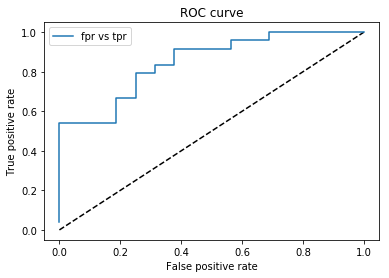

0.848958333333


array([[ 0.43919897],
       [ 0.44095054],
       [ 0.44481304],
       [ 0.43213692],
       [ 0.43301642],
       [ 0.44821182],
       [ 0.43998358],
       [ 0.43949294],
       [ 0.44653338],
       [ 0.4566215 ],
       [ 0.42522499],
       [ 0.43864506],
       [ 0.41512999],
       [ 0.42032909],
       [ 0.43248567],
       [ 0.43788612],
       [ 0.43995345],
       [ 0.44747868],
       [ 0.43097633],
       [ 0.43440694],
       [ 0.4309313 ],
       [ 0.43624404],
       [ 0.44476974],
       [ 0.43496889],
       [ 0.44164598],
       [ 0.43435538],
       [ 0.44447699],
       [ 0.43734565],
       [ 0.43549195],
       [ 0.42807758],
       [ 0.43743017],
       [ 0.42916796],
       [ 0.43645808],
       [ 0.42062423],
       [ 0.43510213],
       [ 0.43698186],
       [ 0.42251498],
       [ 0.43078122],
       [ 0.4271144 ],
       [ 0.42358133]], dtype=float32)

In [76]:
pred = get_print_results(X_train, X_test, y_train, y_test, 20, 1)
pred

## Using all of Kaggle data to train and test

In [77]:
X = k_df.drop(['target','artist','song_title'],axis=1).values
y = k_df['target'].values

print(scaler.fit(X))
X_normalized = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
print X.shape
X_normalized[0,:]


StandardScaler(copy=True, with_mean=True, with_std=True)
(2017, 13)


array([-0.68246675,  1.33287384, -0.50885114, -1.17770008, -0.40786448,
       -0.91644642, -0.16629082, -0.45453036,  0.79573763,  3.76308393,
        1.06670945,  0.12404825, -0.8530387 ])

In [78]:
def get_print_results(X_train, X_test, y_train, y_test, ep, bs):
    model.fit(X_train, y_train,nb_epoch=ep, batch_size=bs)
    pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='fpr vs tpr')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    print auc
    return pred

Epoch 1/10
1613/1613 [==============================] - 0s - loss: 0.6961 - acc: 0.4842 - recall: 0.5554 - precision: 0.3421     
Epoch 2/10
1613/1613 [==============================] - 0s - loss: 0.6952 - acc: 0.4823 - recall: 0.6516 - precision: 0.4264     
Epoch 3/10
1613/1613 [==============================] - 0s - loss: 0.6932 - acc: 0.5208 - recall: 0.6982 - precision: 0.4201     
Epoch 4/10
1613/1613 [==============================] - 0s - loss: 0.6949 - acc: 0.4935 - recall: 0.5638 - precision: 0.3698     
Epoch 5/10
1613/1613 [==============================] - 0s - loss: 0.6946 - acc: 0.5028 - recall: 0.7737 - precision: 0.4780     
Epoch 6/10
1613/1613 [==============================] - 0s - loss: 0.6937 - acc: 0.4997 - recall: 0.5910 - precision: 0.4231     
Epoch 7/10
1613/1613 [==============================] - 0s - loss: 0.6932 - acc: 0.5034 - recall: 0.6622 - precision: 0.4172     
Epoch 8/10
1613/1613 [==============================] - 0s - loss: 0.6938 - acc: 0.4898 - 

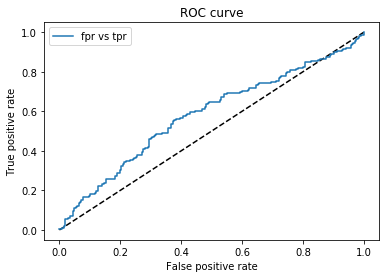

0.580249638294


array([[ 0.51029271],
       [ 0.49667475],
       [ 0.49828878],
       [ 0.50489217],
       [ 0.49933052],
       [ 0.49178836],
       [ 0.50349146],
       [ 0.50740409],
       [ 0.49104464],
       [ 0.50402981]], dtype=float32)

In [79]:
pred = get_print_results(X_train, X_test, y_train, y_test, 10, 5)
pred[:10]